<a href="https://colab.research.google.com/github/saqiba123/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project_(SayabiDevs_task_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4: Sentiment Analysis Project (Twitter dataset)
# Saqiba Juna
# Shayan Hassan
# Rayyan Minhaj  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saqibajuna","key":"1ceef7421ced31d96d6d07a01eb87e62"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 88% 71.0M/80.9M [00:00<00:00, 165MB/s]
100% 80.9M/80.9M [00:00<00:00, 147MB/s]


In [ ]:
! unzip sentiment140.zip 

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
#Importing the dataset
data_columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
data_encoding = "ISO-8859-1"
sentiment_data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=data_encoding, names=data_columns)

In [ ]:
sentiment_data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Removing the unnecessary columns.
sentiment_data = sentiment_data[['sentiment','text']]

In [ ]:
# Replacing the values to ease understanding.
sentiment_data['sentiment'] = sentiment_data['sentiment'].replace(4,1)

In [ ]:
sentiment_data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


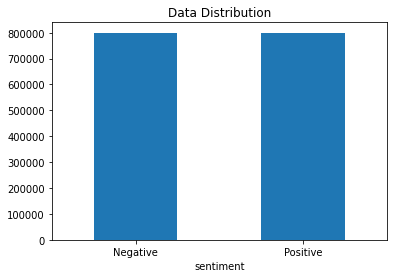

In [ ]:
# Plotting the distribution for dataset.
ax = sentiment_data.groupby('sentiment').count().plot(kind='bar', title='Data Distribution',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(sentiment_data['text']), list(sentiment_data['sentiment'])

# Text Preprocessing

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
import re
from wordcloud import WordCloud
# nltk
from nltk.stem import WordNetLemmatizer


In [ ]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import time
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 146 seconds


# Data Analysis

In [ ]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Negative tweets Word Cloud

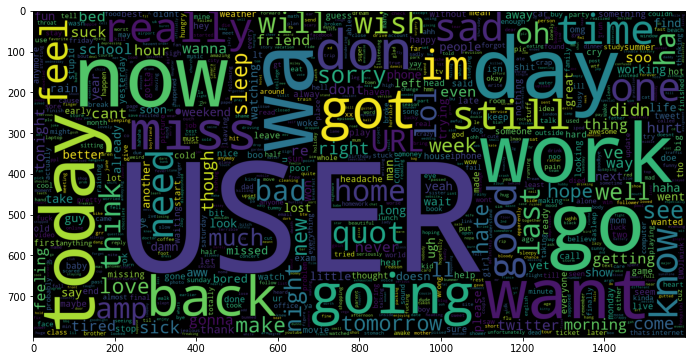

In [ ]:
negative_data = processedtext[:800000]
plt.figure(figsize = (12,6))
words = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative_data))
plt.imshow(words)

# Positve tweets Word Cloud

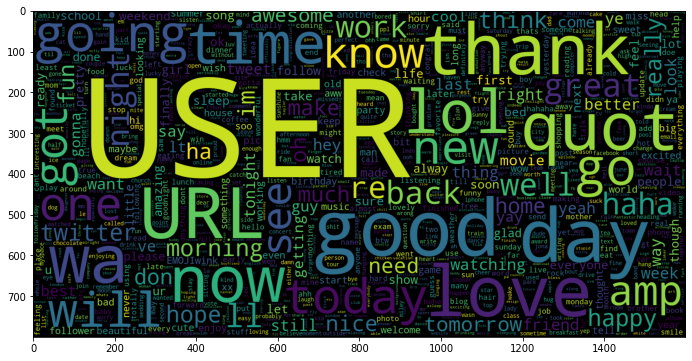

In [ ]:
positive_data = processedtext[800000:]
plt.figure(figsize = (12,6))
words = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(positive_data))
plt.imshow(words)

# Split the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)

# Vectorization using TF-IDF

## TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
TF_vector = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
TF_vector.fit(X_train)
print(f'Done with fitting the TF_vector.')
print('Number of feature_words: ', len(TF_vector.get_feature_names()))

Done with fitting the TF_vector.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of feature_words:  500000


# Data Transformation

## Transform the data into  into matrix of TF-IDF Features 

In [ ]:
X_train = TF_vector.transform(X_train)
X_test  = TF_vector.transform(X_test)

# Train the ML Model

In [ ]:
# import and train the Linear Support Vector Classifier (SVC), Bernoulli Naive Bayes and Logistic Regression model 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# Linear Support Vector Classifier (SVC)

In [ ]:
classifer_SVC = LinearSVC()
classifer_SVC.fit(X_train, y_train)

LinearSVC()

# Function for evaluating the model performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def evaluate_model(model):
    
    # Test data prediction.
    y_pred = model.predict(X_test)

    # classification Report  of data.
    print(classification_report(y_test, y_pred))
    
    # For Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted Data", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual Data"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



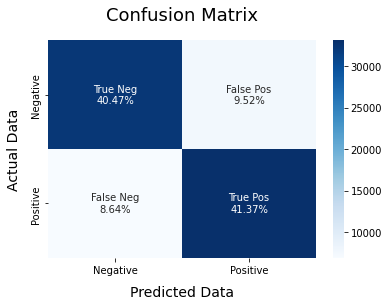

In [ ]:
evaluate_model(classifer_SVC)

 # Bernoulli Naive Bayes Algorithm

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



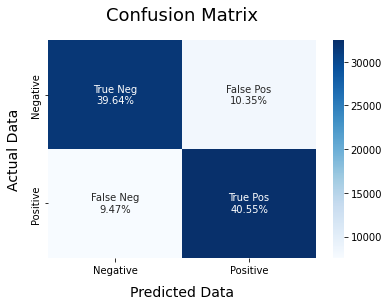

In [ ]:
model = BernoulliNB(alpha = 2)
model.fit(X_train, y_train)
evaluate_model(model)

# Logistic Regression Algorithm

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



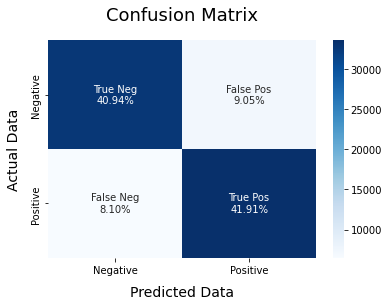

In [ ]:
Log_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
Log_model.fit(X_train, y_train)
evaluate_model(Log_model)

## Since this dataset is not skewed, then the predicted positive and negative are equal in number.

# Save the models

In [ ]:
import pickle

In [ ]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(TF_vector, file)
file.close()


In [ ]:
# save logistic and bernoulli Naive Bayes model
file = open('Sentiment-Log_model.pickle','wb')
pickle.dump(Log_model, file)
file.close()

file = open('Sentiment-BNmodel.pickle','wb')
pickle.dump(model, file)
file.close()

# Test the model

In [ ]:
def load_models():
    
    # Load the vectorizer.
    file = open('vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the Logistic Regression Model.
    file = open('Sentiment-Log_model.pickle', 'rb')
    Log_model = pickle.load(file)
    file.close()
    
    return vectoriser, Log_model

In [ ]:

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df


In [ ]:

if __name__=="__main__":
    # Loading the models.
    vectoriser, Log_model = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate facebook",
            "Great performance of SayabiDevs",
            "I don't feel good to work today!"]
    
    df = predict(vectoriser, Log_model, text)
    print(df.head())

                               text sentiment
0                   I hate facebook  Negative
1   Great performance of SayabiDevs  Positive
2  I don't feel good to work today!  Negative
